In [560]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process.kernels import RBF

In [588]:
#Data generation at regular intervals
intervals= 4
points=5
x = np.concatenate([np.linspace(np.pi * i, np.pi * (i + 1), points) for i in range(0, intervals, 2)]) 
    
poly=PolynomialFeatures(4)
X= poly.fit_transform(np.expand_dims(x,axis=1))

d= X.shape[1]   #No. of dimensions
N= X.shape[0]   #No. of samples

Y= np.sin(np.expand_dims(x,axis=1)) + np.random.normal(0, .1, (N,1))

In [589]:
#Distribution parameters
#Error: P(e)
variance_e= .1
mean_e= np.zeros((N,1))
var_e= variance_e*np.eye(N)

#Prior: P(W)
variance_w=1
mean_w= np.zeros((d,1))
var_w= variance_w*np.eye(d)

In [590]:
#Posterior: P(W|Y)
T= var_w@X.T@inv((X@var_w@X.T+ var_e))

post_mean = mean_w + T@(Y-X@mean_w)           #Posterior mean 
post_var  = var_w- T@X@var_w                  #Posterior variance

In [591]:
#Least squares closed form solution
lamda= (variance_e/variance_w)*np.eye(d)      #Regularization parameter
w_closed= inv(X.T@X+ lamda)@X.T@Y             #Regularized closed form solution

np.allclose(w_closed, post_mean, rtol=.01)    #Check if regularized closed form and posterior mean are within tolerance of each other

True

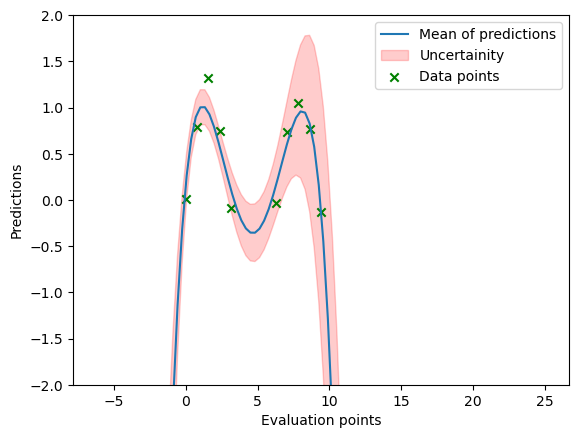

In [593]:
#Predicitve Distribution
x_ax= np.linspace(-2*np.pi, 8*np.pi, 100)                        #Points to evaluate predictions
X_ax= poly.fit_transform(np.expand_dims(x_ax,axis=1))            #Basis function

pred_mean= X_ax @ post_mean                                      #Mean of the predictions
pred_var= np.expand_dims(np.diag(X_ax@post_var@X_ax.T), axis=1)  #Variance of predictions
pred_std= np.sqrt(pred_var)                                      #Std dev of predictions

plt.plot(x_ax, pred_mean, label='Mean of predictions')
plt.fill_between(x_ax, np.squeeze(pred_mean-pred_std), np.squeeze(pred_mean+pred_std), color='red', alpha=0.2, label= "Uncertainity")
plt.scatter(x,Y, marker="x", color="green", label="Data points" )
plt.ylim((-2,2))
plt.ylabel('Predictions')
plt.xlabel('Evaluation points')
plt.legend()
plt.show()